# Central Tendancy

In [1]:
import statistics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

In [2]:
forbes_data = pd.read_csv('datasets/forbes.csv')

forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [3]:
forbes_data.isnull()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,True
1997,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False


In [4]:
forbes_data.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [5]:
forbes_data.dropna(inplace=True)

forbes_data.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [6]:
forbes_data.shape

(1508, 9)

In [7]:
market_value_mean = forbes_data['Market Value'].mean()

market_value_mean

26.978494031830238

In [8]:
market_value_median = forbes_data['Market Value'].median()

market_value_median

13.1

In [9]:
diff_mean_median = market_value_mean - market_value_median
diff_mean_median

13.878494031830238

In [10]:
# sector is categorical data

forbes_data['Sector'].value_counts()

Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: Sector, dtype: int64

In [11]:
forbes_data['Sector'].mode()

0    Financials
dtype: object

## box plot

- mean 
- median
- 25th percentile
- 75th percentile
- maximum values are where in the data
- outliers

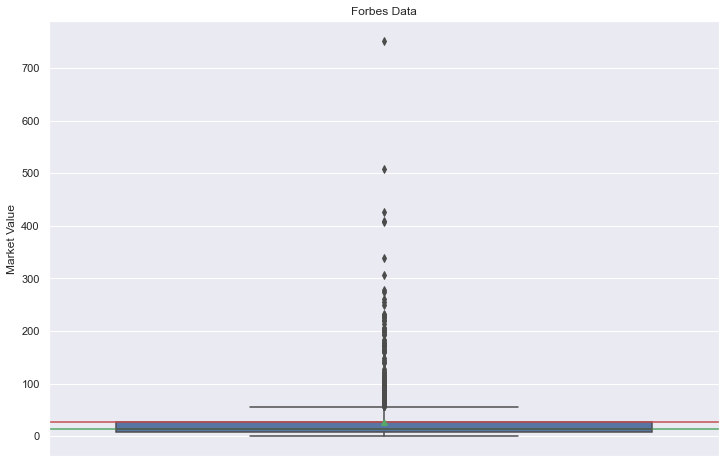

In [12]:
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y = 'Market Value', showmeans=True)

plt.axhline(y = market_value_mean, color='r', linestyle='-')
plt.axhline(y = market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

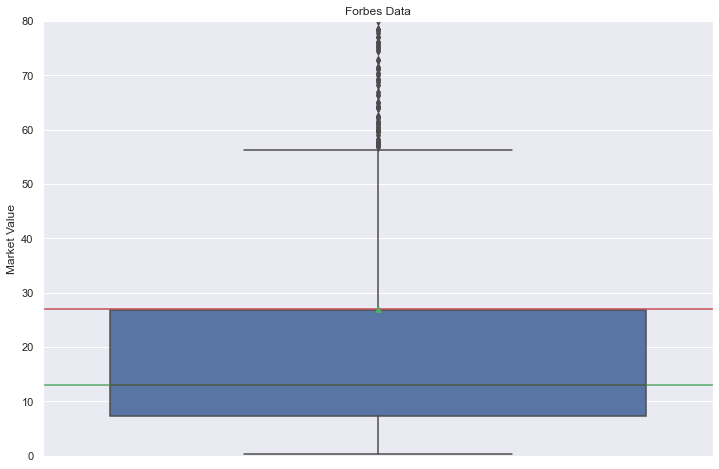

In [13]:
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y = 'Market Value', showmeans=True)

plt.ylim(0, 80)

plt.axhline(y = market_value_mean, color='r', linestyle='-')
plt.axhline(y = market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

## mode


In [14]:
groupded_data = forbes_data.groupby('Sector', as_index=False).count()

groupded_data.head()

,Sector,Rank,Company,Country,Sales,Profits,Assets,Market Value,Industry
0,Consumer Discretionary,209,209,209,209,209,209,209,209
1,Consumer Staples,106,106,106,106,106,106,106,106
2,Energy,79,79,79,79,79,79,79,79
3,Financials,474,474,474,474,474,474,474,474
4,Health Care,71,71,71,71,71,71,71,71


In [15]:
groupded_data = groupded_data[['Sector', 'Rank']]

groupded_data = groupded_data.sort_values(by='Rank', ascending=False)

groupded_data

,Sector,Rank
3,Financials,474
0,Consumer Discretionary,209
5,Industrials,192
7,Materials,145
1,Consumer Staples,106
6,Information Technology,103
9,Utilities,86
2,Energy,79
4,Health Care,71
8,Telecommunication Services,43


## pie chart

- mode
- category wise display values
- percentage of values aquired by category

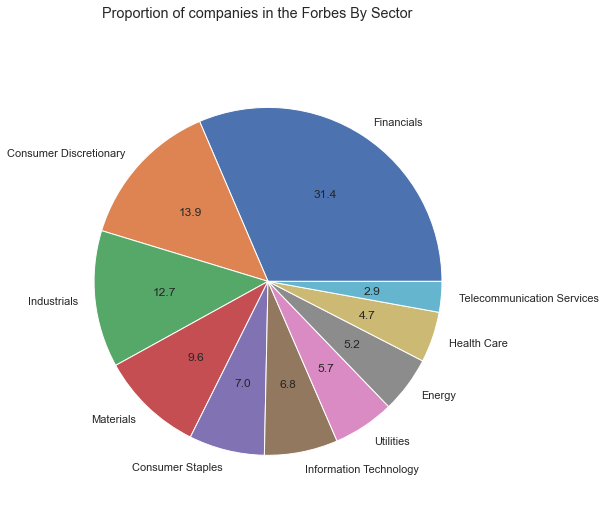

In [16]:
plt.figure(figsize=(12,8))

plt.pie(groupded_data['Rank'], labels=groupded_data['Sector'], autopct='%.1f')

plt.suptitle('Proportion of companies in the Forbes By Sector')

plt.show()

# Dispersion

In [17]:
forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


### Range

In [18]:
profit_max = forbes_data['Profits'].max()

profit_max

45.2

In [19]:
profit_min = forbes_data['Profits'].min()

profit_min

-13.0

In [20]:
profit_range = profit_max - profit_min

profit_range

58.2

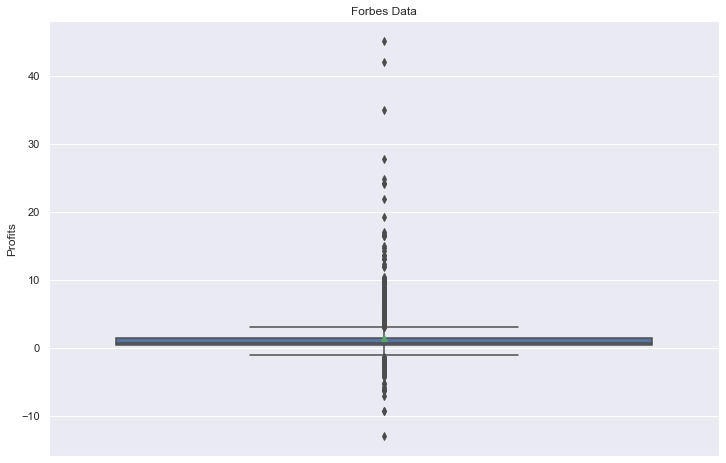

In [21]:
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y= 'Profits', showmeans=True)

plt.title("Forbes Data")

plt.show()

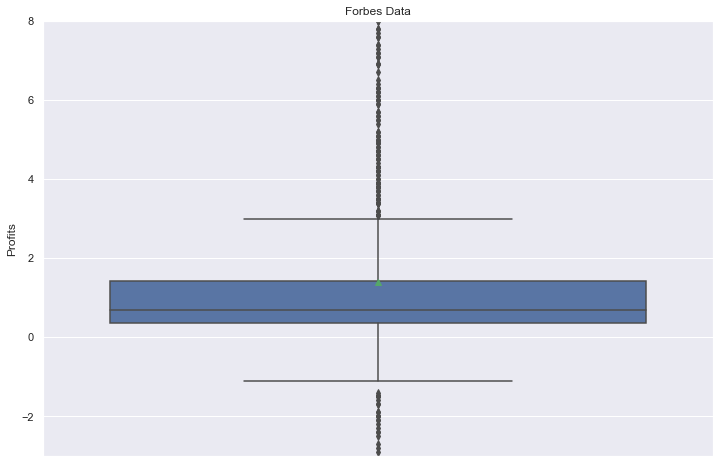

In [22]:
plt.figure(figsize=(12,8))

sns.boxplot(data=forbes_data, y= 'Profits', showmeans=True)

plt.ylim(-3,8)

plt.title("Forbes Data")

plt.show()

### Inter Quartile Range

In [23]:
Q1 = np.quantile(forbes_data['Profits'], 0.25)
Q1

0.34975

In [24]:
Q3 = np.quantile(forbes_data['Profits'], 0.75)
Q3

1.4249999999999998

In [25]:
IQR = Q3 - Q1

IQR

1.0752499999999998

### Standard Deviation

In [26]:
profit_std = forbes_data['Profits'].std()

profit_std

3.244201278603241

In [27]:
profit_var = profit_std ** 2

profit_var

10.524841936090903

In [28]:
profit_var = forbes_data['Profits'].var()

profit_var

10.524841936090903

In [29]:
profit_mean = forbes_data['Profits'].mean()

profit_mean

1.4074303713527854

### Summary statistics

In [30]:
forbes_data.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000


# Normal Distribution

In [31]:
import numpy as np
import pandas as pd

# from scipy import stats

# import statsmodels.api as sm
# from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

In [32]:
## generating normal distribution data

mean = 0
std = 1

In [33]:
normally_distributed_data = np.random.normal(loc=0, scale=1, size = 100000)

normally_distributed_data[:10]

array([-0.09640365,  0.90106989, -0.08321826, -0.37563022, -0.22721013,
        1.07828388, -1.13932402, -0.26280846, -0.19877228, -1.13314012])

In [34]:
# mean == median # normal distribution

In [35]:
sample_mean = np.mean(normally_distributed_data)
sample_mean

0.0030389768423973243

In [36]:
sample_median = np.median(normally_distributed_data)
sample_median

0.001094059124683335

In [37]:
sample_std = np.std(normally_distributed_data)
sample_std

0.9988662347430736

### Plotting ND

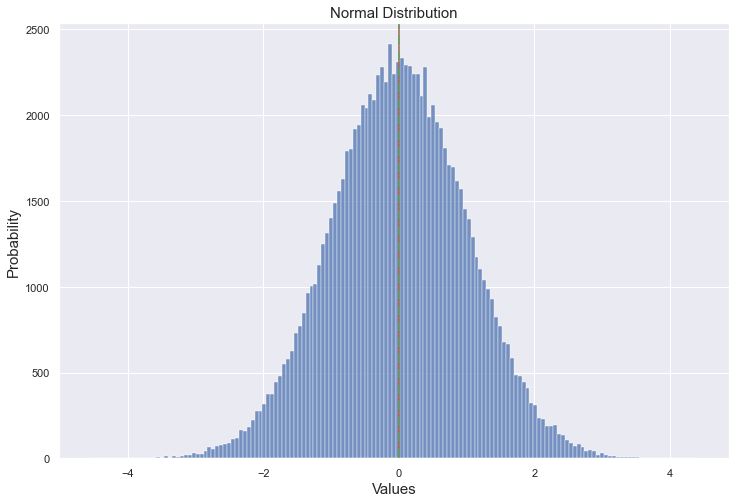

In [38]:
plt.figure(figsize=(12,8))

sns.histplot(x= normally_distributed_data)

plt.title("Normal Distribution", fontsize='15')

plt.axvline(x = sample_mean, color='r', linestyle='-')
plt.axvline(x = sample_median, color='g', linestyle='-.')

plt.xlabel('Values', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

## KDE plot


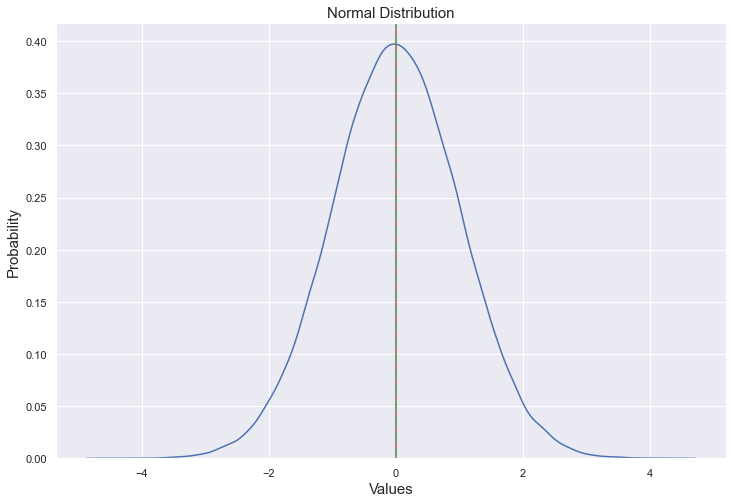

In [39]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= normally_distributed_data)

plt.title("Normal Distribution", fontsize='15')

plt.axvline(x = sample_mean, color='r', linestyle='-')
plt.axvline(x = sample_median, color='g', linestyle='-.')

plt.xlabel('Values', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

In [40]:
normally_distributed_data_std3 = np.random.normal(loc=0, scale=3, size=100000)

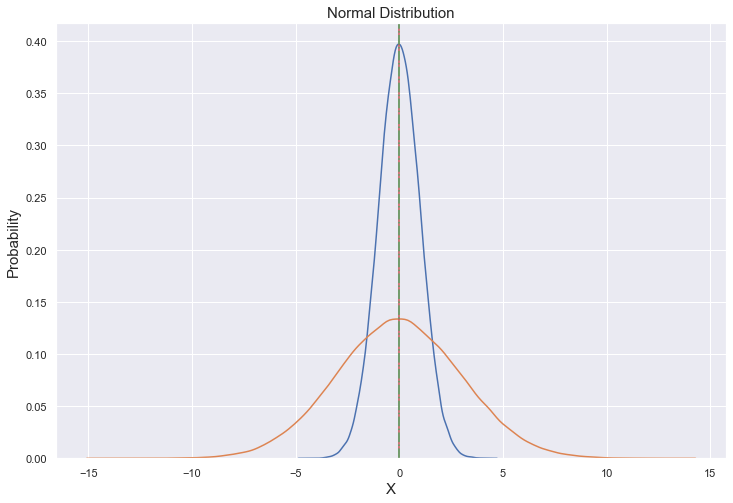

In [41]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= normally_distributed_data)

sns.kdeplot(x= normally_distributed_data_std3)

plt.title("Normal Distribution", fontsize='15')

plt.axvline(x = sample_mean, color='r', linestyle='-')
plt.axvline(x = sample_median, color='g', linestyle='-.')

plt.xlabel('X', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

In [42]:
normally_distributed_data_loc2 = np.random.normal(loc=2, scale=1, size=100000)

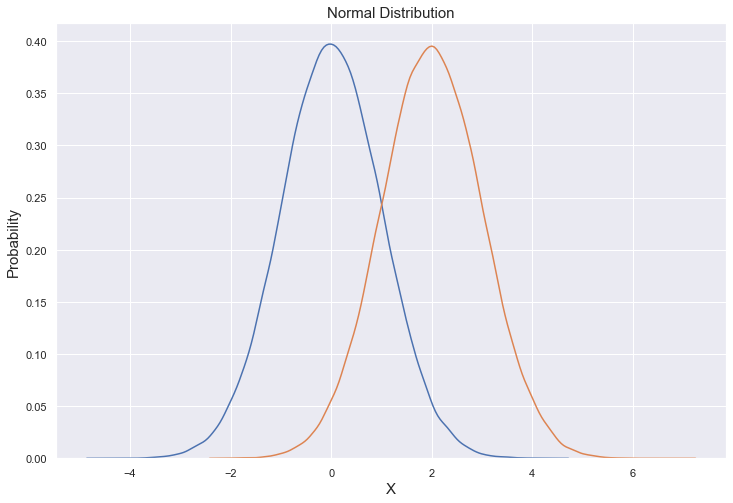

In [43]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= normally_distributed_data)

sns.kdeplot(x= normally_distributed_data_loc2)

plt.title("Normal Distribution", fontsize='15')

# plt.axvline(x = sample_mean, color='r', linestyle='-')
# plt.axvline(x = sample_median, color='g', linestyle='-.')

plt.xlabel('X', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

## Apply on Dataset

In [45]:
loan_data = pd.read_csv('datasets/data_loan.csv')

loan_data.head()

,ID,Default,Loan_type,Gender,Age,Degree,Income,Credit_score,Loan_length,Signers,Citizenship
0,1,0,Car,Female,30,HS,114885,641,0,2,Citizen
1,2,0,Home,Female,43,HS,95770,534,7,2,Citizen
2,3,0,Home,Male,39,HS,94220,558,5,2,Citizen
3,4,0,Home,Male,39,College,58946,622,7,2,Citizen
4,5,0,Car,Female,42,HS,79754,702,2,1,Citizen


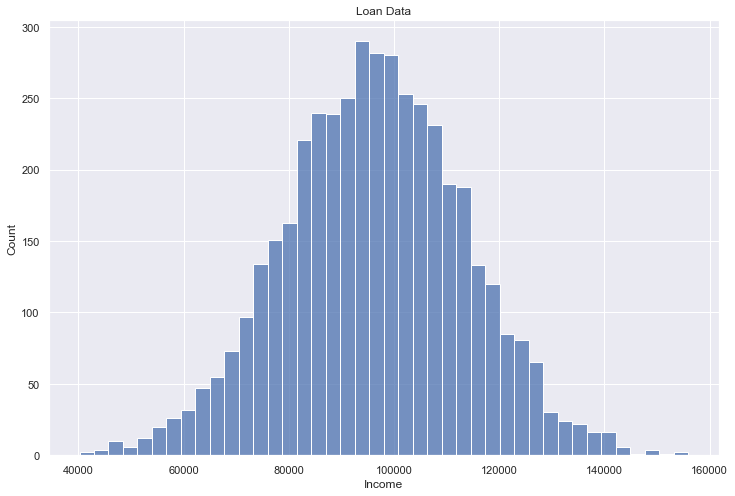

In [46]:
plt.figure(figsize=(12,8))

sns.histplot(loan_data['Income'], color='b')

plt.title("Loan Data")

plt.show()

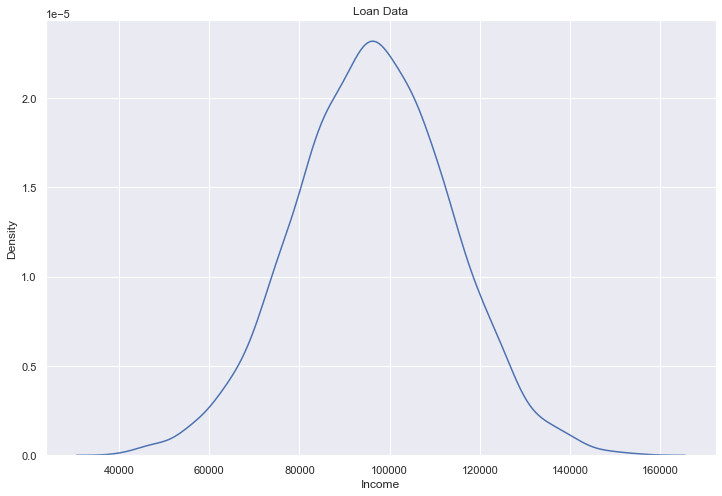

In [47]:
plt.figure(figsize=(12,8))

sns.kdeplot(loan_data['Income'], color='b')

plt.title("Loan Data")

plt.show()

In [48]:
income_mean = loan_data['Income'].mean()
income_mean

96266.33900643974

In [49]:
income_median = loan_data['Income'].median()
income_median

96367.5

## Probability Plot

In [50]:
from scipy import stats

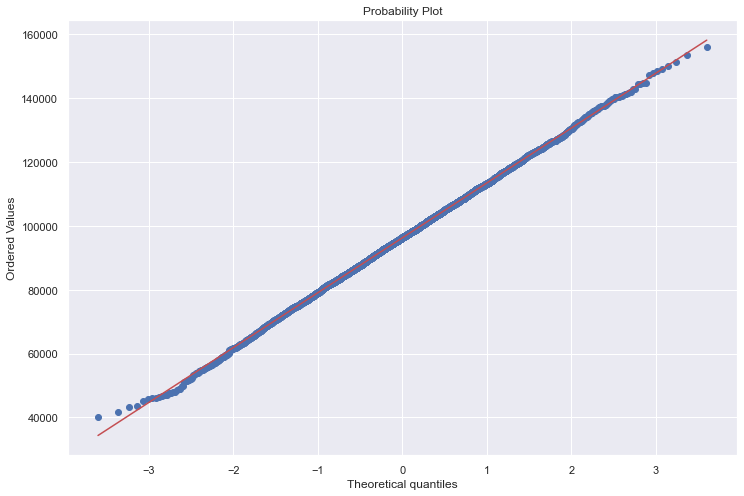

In [51]:
plt.figure(figsize=(12,8))

stats.probplot(loan_data['Income'], plot = plt, dist='norm')

plt.show()

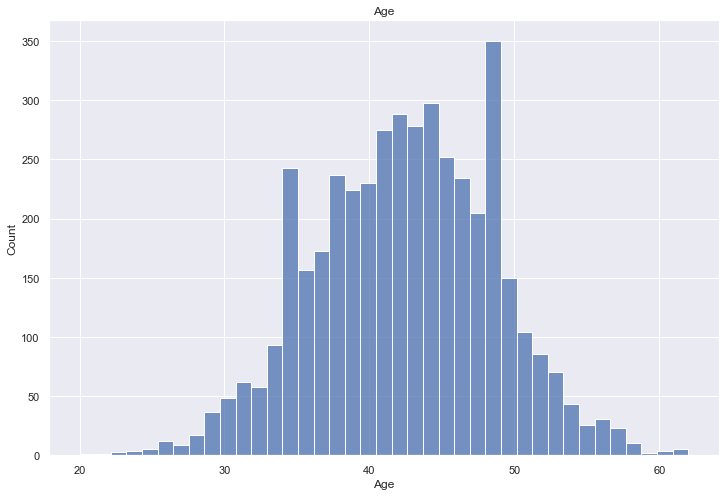

In [52]:
plt.figure(figsize=(12,8))

sns.histplot(loan_data['Age'], color='b')

plt.title("Age")

plt.show()

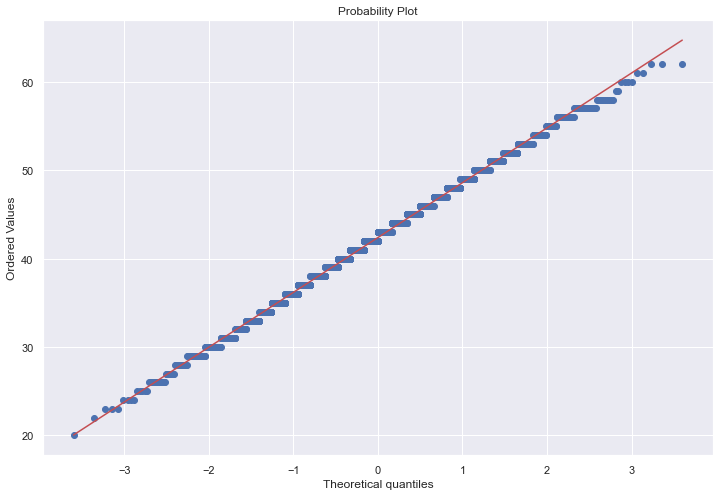

In [53]:
plt.figure(figsize=(12,8))

stats.probplot(loan_data['Age'], plot = plt, dist='norm')

plt.show()

In [ ]:
# theoritical qq plot 